In [1]:
import torch 
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from utils import *

In [2]:
def electron_count_to_jansky_per_arcsec_squared(img, photflam, photplam):
    zero_point = -2.5 * np.log10(photflam) - 21.10 - 5 * np.log10(photplam) + 18.6921
    return img * 10**(-(zero_point - 8.9)/2.5)

def adu_to_electron_count(img, gain, exposure_time):
    """
    A small remainder on how to convert ADU to electron / sec units
    """
    return gain * img / exposure_time

### Probes units: 

The units of probes are ergs/s/cm^2/Hz


$$
FWHM = 1.13 \frac{\lambda}{D}
$$ 

Let's say we observe at $\lambda=$ 1.3 mm, FWHM = 
The target units are Jansky/beam = 

C:\Users\noedi\AppData\Local\Temp\ipykernel_15116\1387416884.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = preprocess_probes_g_channel(torch.tensor(img)).numpy() * u.erg/u.s/(u.cm**2) * u.s


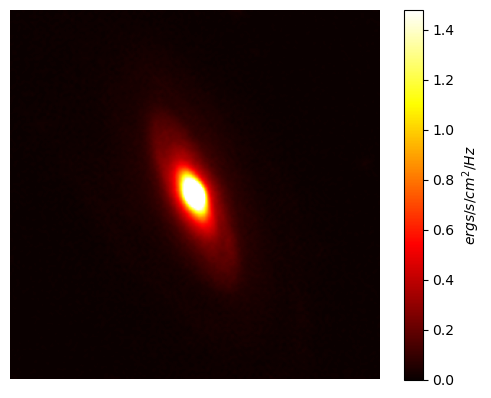

In [65]:
# Showing probes image with units 
img = torch.load("../../true_prior.pt")[1, ..., 1] 
img = preprocess_probes_g_channel(torch.tensor(img)).numpy() * u.erg/u.s/(u.cm**2) * u.s
plt.imshow(img.value, cmap = "hot", origin = "lower")
plt.axis("off")
plt.colorbar(label = r"$ergs/s/cm^2/Hz$")

In [66]:
from astropy import units as u
from astropy.constants import c

In [68]:
wavelength = 1.25 * 1e-3 * u.m # meters
f = c/wavelength # Hz
D = 12 * u.m # antenna diameter (meters)
fwhd = 1.13 * wavelength / D * u.rad # rads


beam = fwhd.to(u.arcsec)
beam_area = 2 * np.pi * beam ** 2

img = img.to(u.Jansky) /beam_area# erg/s/cm²/Hz to Jansky/beam.shape

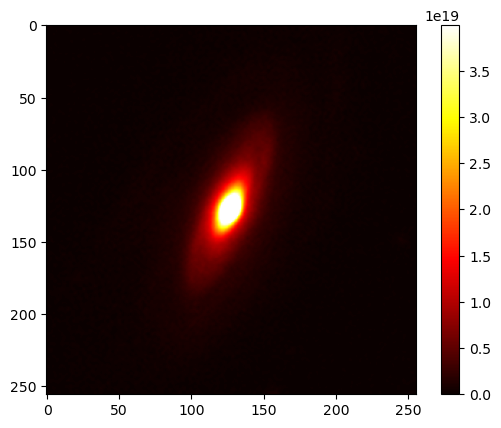

In [69]:
plt.imshow(img.value, cmap = "hot")
plt.colorbar()

In [13]:
fwhd

<Quantity 0.00012242 rad>